<a href="https://colab.research.google.com/github/Liza-IITP/Quant-Finance/blob/main/Assignment_1_QSTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

Write a Python script to analyze historical stock data for a NIFTY50 stock from Yahoo Finance for the period from August 1, 2023,  to July 29th, 2025. The script should:

Install the necessary libraries (numpy, pandas, yfinance, matplotlib).
Download the data for the given period.
Extract the Open, High, Low, Close, Adj Close, and Volume columns.
Calculate and plot the 14-day and 50-day relative strength index (RSI) on the same graph, with different colors for each RSI.
Compute and visualize the daily percentage change in the Closing Prices and plot it as a histogram with appropriate bins.
Create a subplot with three charts:
The first chart should display the daily Closing Prices with 14-day and 50-day RSI.
The second chart should show the daily Volume.
The third chart should display the histogram of daily percentage changes.

Deadline- 3rd August 11.59pm

In [38]:
# Install necessary libraries
# Import libraries
!pip install numpy pandas yfinance matplotlib
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [39]:
# Define the stock ticker and date range
# Download historical stock data
ticker = "^NSEI"
start_date = "2023-08-01"
end_date = "2025-07-29"
data = yf.download(ticker, start=start_date, end=end_date)
data.info()

/tmp/ipython-input-39-3065252412.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-08-01 to 2025-07-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   491 non-null    float64
 1   (High, ^NSEI)    491 non-null    float64
 2   (Low, ^NSEI)     491 non-null    float64
 3   (Open, ^NSEI)    491 non-null    float64
 4   (Volume, ^NSEI)  491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [40]:
# Extract the relevant columns
df = data[["Open", "High", "Low", "Close", "Volume"]].copy()

In [41]:
# 14‑day RSI
delta = df["Close"].diff()
gain14 = delta.where(delta > 0, 0.0)
loss14 = -delta.where(delta < 0, 0.0)
avg_gain14 = gain14.rolling(window=14, min_periods=14).mean()
avg_loss14 = loss14.rolling(window=14, min_periods=14).mean()
rs14 = avg_gain14 / avg_loss14
df["RSI_14"] = 100 - (100 / (1 + rs14))

# 50‑day RSI
gain50 = delta.where(delta > 0, 0.0)
loss50 = -delta.where(delta < 0, 0.0)
avg_gain50 = gain50.rolling(window=50, min_periods=50).mean()
avg_loss50 = loss50.rolling(window=50, min_periods=50).mean()
rs50 = avg_gain50 / avg_loss50
df["RSI_50"] = 100 - (100 / (1 + rs50))


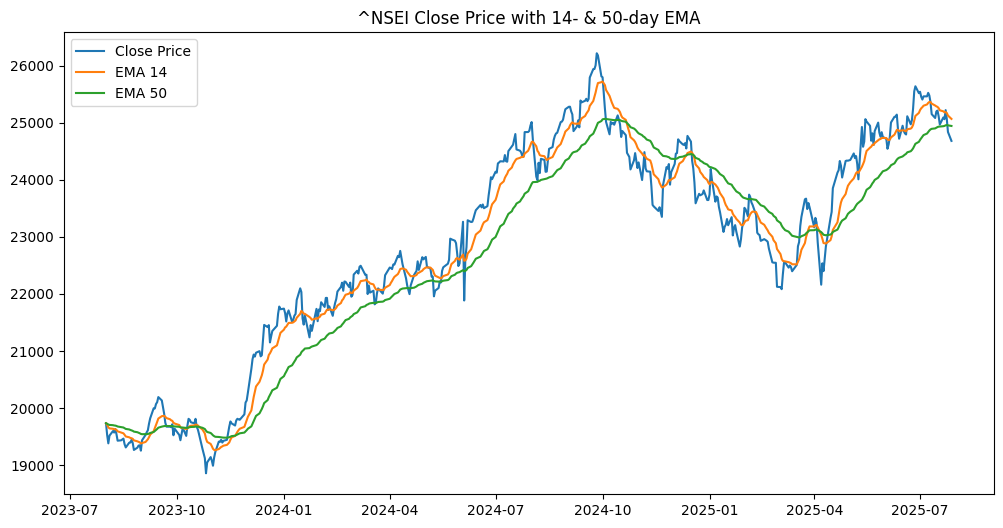

In [42]:
# Calculate the 14-day and 50-day exponential moving averages (EMAs)
# Plot the Closing Prices with EMAs
df["EMA_14"] = df["Close"].ewm(span=14, adjust=False).mean()
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()

# Plot the Closing Prices with EMAs
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["EMA_14"], label="EMA 14")
plt.plot(df["EMA_50"], label="EMA 50")
plt.title(f"{ticker} Close Price with 14‑ & 50‑day EMA")
plt.legend()
plt.show()

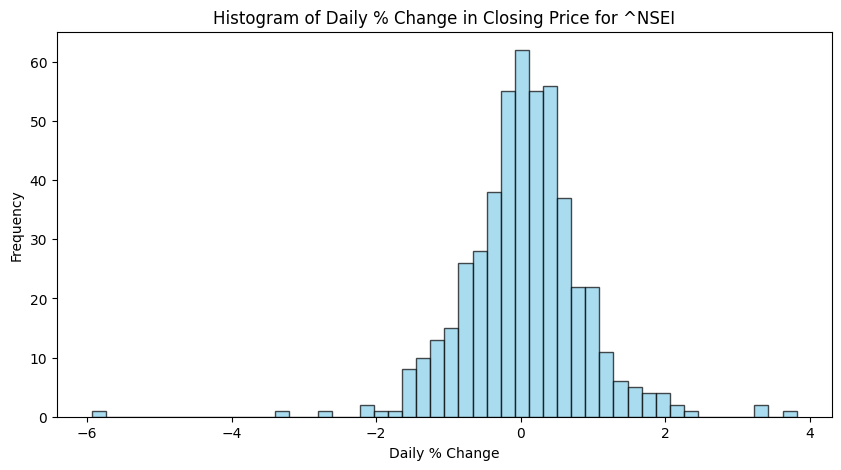

In [43]:
# Calculate the daily percentage change in Closing Prices
# Plot histogram of daily percentage changes
df["Pct_Change"] = df["Close"].pct_change() * 100.0

# Plot histogram of daily percentage changes
plt.figure(figsize=(10,5))
plt.hist(df["Pct_Change"].dropna(), bins=50, alpha=0.7, color="skyblue", edgecolor="black")
plt.title(f"Histogram of Daily % Change in Closing Price for {ticker}")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.show()

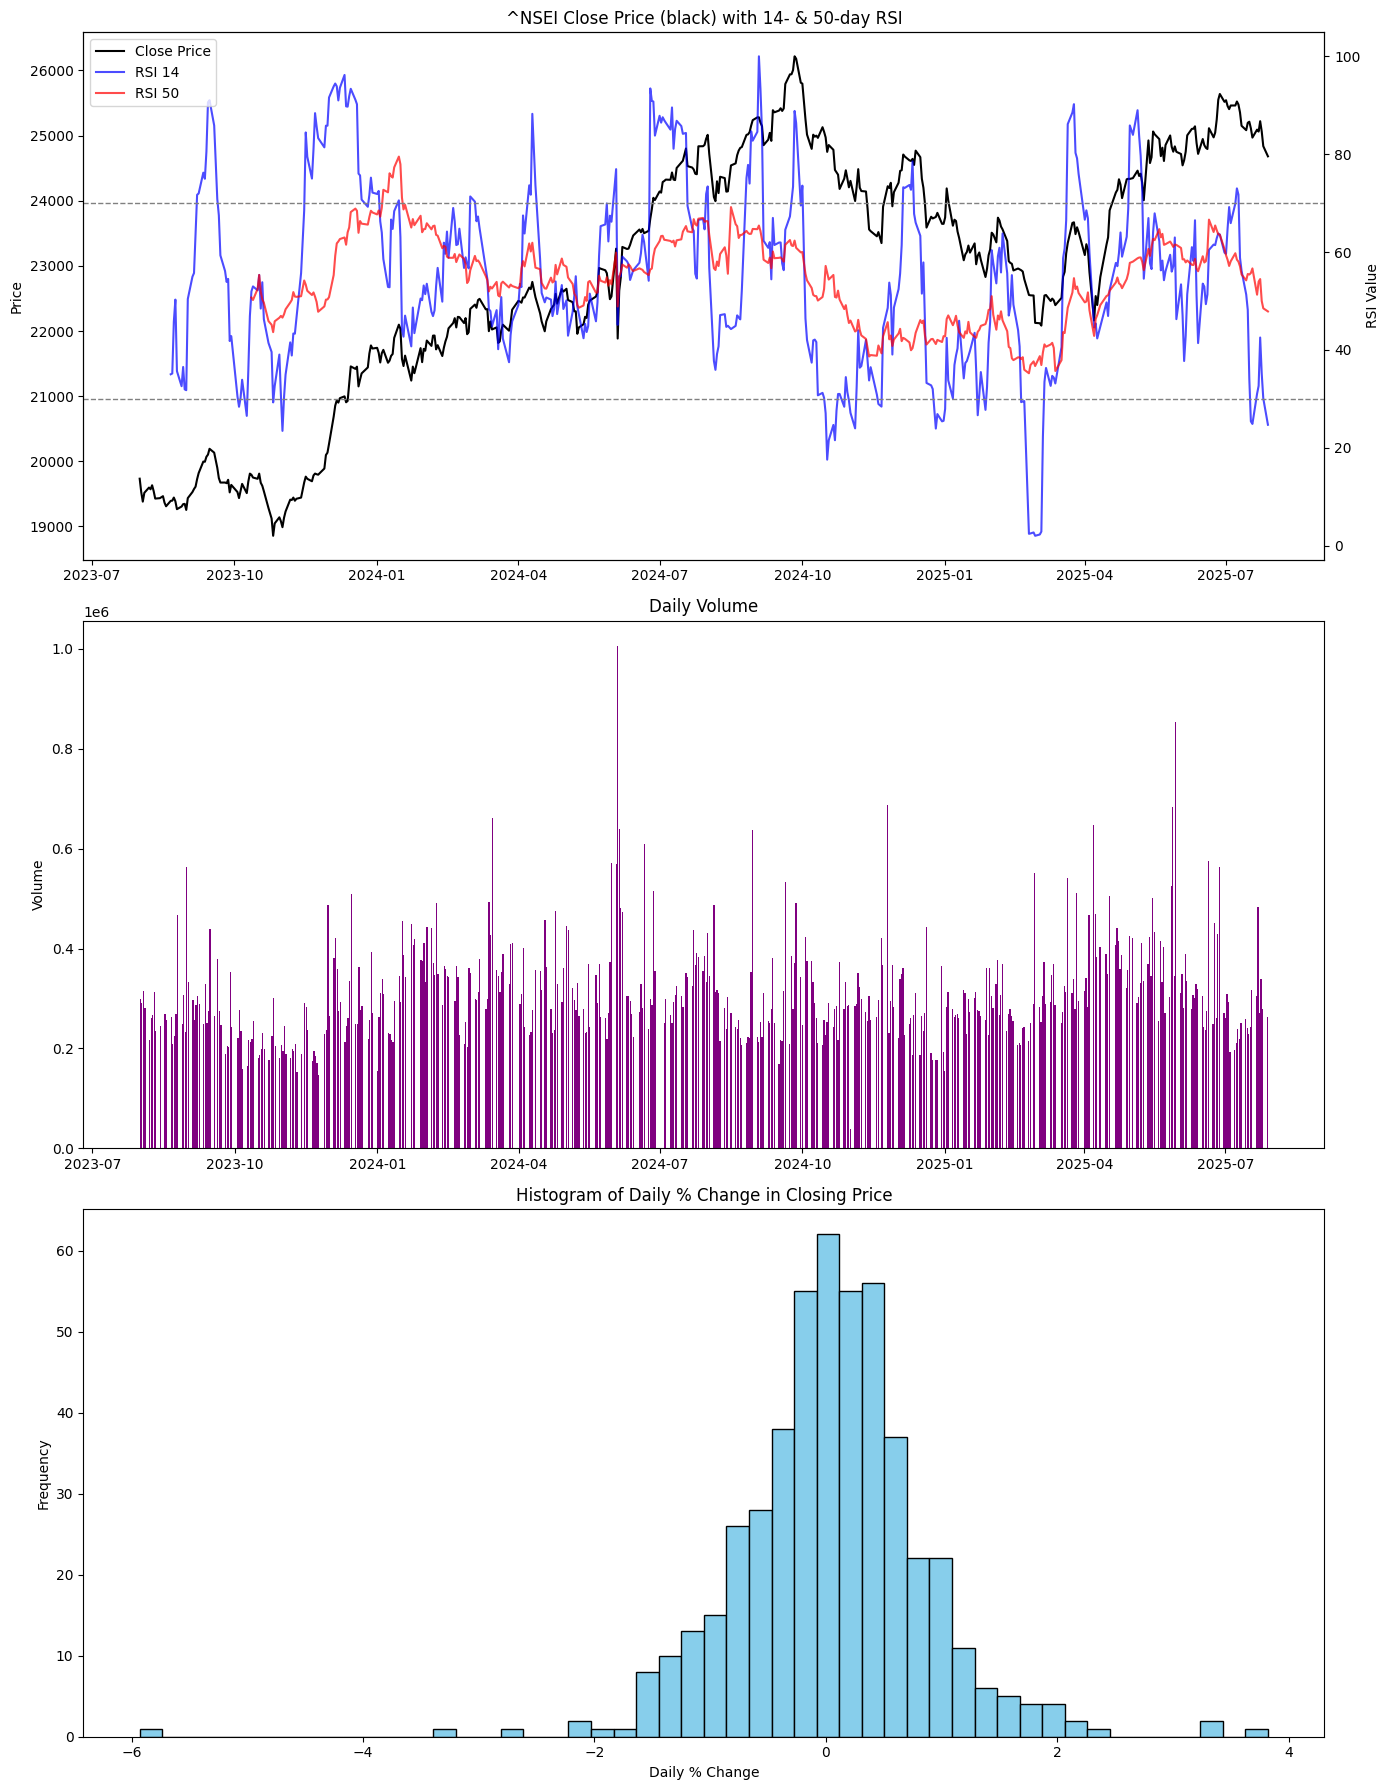

In [44]:
# CELL 7: Subplots: (1) Close+RSIs, (2) Volume, (3) histogram of daily % changes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=False)

# Subplot 1: Close Price + RSI
ax = axes[0]
ax.plot(df["Close"], label="Close Price", color="black")
ax2 = ax.twinx()
ax2.plot(df["RSI_14"], label="RSI 14", color="blue", alpha=0.7)
ax2.plot(df["RSI_50"], label="RSI 50", color="red", alpha=0.7)
ax.set_title(f"{ticker} Close Price (black) with 14‑ & 50‑day RSI")
ax.set_ylabel("Price")
ax2.set_ylabel("RSI Value")
ax2.axhline(70, color="grey", linestyle="--", lw=1)
ax2.axhline(30, color="grey", linestyle="--", lw=1)
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Subplot 2: Volume (avoid 2D arrays)
vol = df["Volume"]
# If somehow it's 2D (e.g. shape (N,1)), flatten to 1D:
if hasattr(vol.values, 'reshape') and vol.values.ndim > 1:
    vol = vol.values.reshape(len(vol))
else:
    vol = vol.values
axes[1].bar(df.index, vol, color="purple")
axes[1].set_title("Daily Volume")
axes[1].set_ylabel("Volume")

# Subplot 3: histogram of daily % changes
axes[2].hist(df["Pct_Change"].dropna(), bins=50, color="skyblue", edgecolor="black")
axes[2].set_title("Histogram of Daily % Change in Closing Price")
axes[2].set_xlabel("Daily % Change")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
